** ** 

<figure>
<div style="text-align:center"><img src="./img/junction.png" /></div>
<p><center>Simplified diagram of a Josephson Junction.</center></p>
</figure>

# Ic vs T

** **

* This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
#import libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
from lmfit.models import QuadraticModel

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/Josephson_data.csv", sep = ",", header = None)

#Preview the data
df.head()

,0,1,2,3,4,5,6
0,23.4006,20.7588,15.4768,2.881,3.4989,2.7127,4.5206
1,23.1830,20.8883,15.5845,2.881,3.4938,2.7115,4.5344
2,20.4127,20.8871,15.6293,2.867,3.4728,2.7063,4.5910
3,22.3344,20.8102,15.5944,2.881,3.4624,2.7037,4.6189
4,22.3391,21.1800,15.9014,2.867,3.4489,2.7002,4.6549


## Data Wrangling

In [4]:
df.rename(columns = {0: "Ic", 1: "Ic_weak", 2: "Ic_strong", 
                     3: "V_gap", 4: "Vg_weak", 5: "Vg_strong", 6: "Temp"}, inplace = True)
df.head()

,Ic,Ic_weak,Ic_strong,V_gap,Vg_weak,Vg_strong,Temp
0,23.4006,20.7588,15.4768,2.881,3.4989,2.7127,4.5206
1,23.1830,20.8883,15.5845,2.881,3.4938,2.7115,4.5344
2,20.4127,20.8871,15.6293,2.867,3.4728,2.7063,4.5910
3,22.3344,20.8102,15.5944,2.881,3.4624,2.7037,4.6189
4,22.3391,21.1800,15.9014,2.867,3.4489,2.7002,4.6549


In [5]:
#Load Data
x = df["Temp"]
y = df["V_gap"]

z = df["Vg_weak"]

m = df["Vg_strong"]

## Fit a best fit line through the experimental data

In [6]:
#use the builtin quadratic model:
mod1 = QuadraticModel(prefix='g1_')

#set initial parameters
pars1 = mod1.guess(y, x=x)

In [19]:
#fit with weights=1./yerr
result1 = mod1.fit(y, pars1, x=x, method = 'nelder', weights = 1./ (np.std(y) * 0.05544))

#print the Fit Statistics and parameters
print()
print(result1.fit_report())
print()


[[Model]]
    Model(parabolic, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 100
    # data points      = 21
    # variables        = 3
    chi-square         = 18.0019735
    reduced chi-square = 1.00010964
    Akaike info crit   = 2.76513806
    Bayesian info crit = 5.89870537
    R-squared          = -11.1808428
[[Variables]]
    g1_a: -0.11109154 +/- 0.00526099 (4.74%) (init = -0.1110915)
    g1_b:  0.96296618 +/- 0.06078126 (6.31%) (init = 0.9629662)
    g1_c:  0.78862873 +/- 0.17132470 (21.72%) (init = 0.7886287)
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_b, g1_c) = -0.9982
    C(g1_a, g1_b) = -0.9979
    C(g1_a, g1_c) = +0.9923



## Plot the data and model

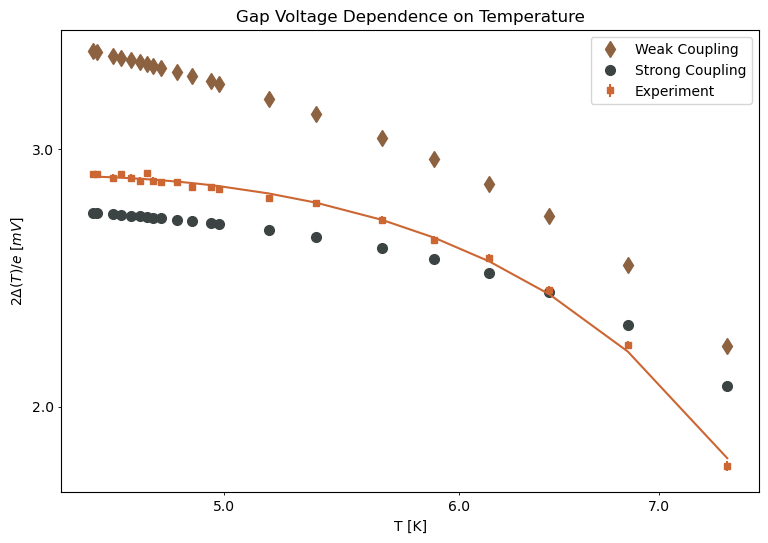

In [24]:
fig, ax = plt.subplots(figsize = (9, 6))

ax.set_xscale('log')
ax.set_yscale('log')

ax.errorbar(x, y, yerr=(np.std(y) * 0.05544), fmt='s', label="Experiment", markersize=5, color= "#cc6633")
ax.plot(x, z, 'd', label="Weak Coupling", markersize=8, color= '#%02x%02x%02x' %  (141, 98, 65))
ax.plot(x, m, 'o', label="Strong Coupling", markersize=7, color= '#%02x%02x%02x' % (60, 68, 67))
ax.plot(x, result1.best_fit, color= "#cc6633", linewidth=1.5)

ax.set_title("Gap Voltage Dependence on Temperature")
ax.set_xlabel("T [K]")
ax.set_ylabel("$2\Delta(T) / e$ $[mV]$")
ax.grid(False)
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().xaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().xaxis.set_minor_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().yaxis.set_minor_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain')

ax.legend()
plt.show()

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>